### 카테고리 분포 (categorical distribution)

- 베르누이 분포의 확장
- 1부터 k까지의 k개의 정수 값 중 하나가 나오는 확률 변수의 분포
- 대표적인 예 : 주사위를 던졌을 때의 확률분포

[참고] 데이터 사이언스 스쿨 : https://datascienceschool.net/view-notebook/354eb1d0e307423697ed805df07b96a5/


[참고] 다차원 벡터로 변형하여 사용 : 원-핫-인코딩(One-Hot-Encoding)

        x=1 → x=(1,0,0,0,0,0)
        x=2 → x=(0,1,0,0,0,0)
        x=3 → x=(0,0,1,0,0,0)
        x=4 → x=(0,0,0,1,0,0)
        x=5 → x=(0,0,0,0,1,0)
        x=6 → x=(0,0,0,0,0,1)


In [19]:
""" scipy를 이용한 카테고리 분포 시뮬레이션 

    - scipy에서는 카테고리 분포 클래스 제공 없음
    - 다항 분포를 위한 클래스 multinomial을 이용하여 카테고리 분포 객체 생성 가능
      (multinomial 클래스에서 시행횟수를 1로 설정)
"""

import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [30]:
theta = np.array([1/6]*6) # 1/6의 수 6개
print(theta)
rv = sp.stats.multinomial(1, theta)

xx = np.arange(1,7) # 1부터 6까지
print(xx)
xx_ohe = pd.get_dummies(xx)
print(xx_ohe)
"""
    get_dummies()는 One-Hot-Encoding 방식을 만들 때 사용
"""

[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
[1 2 3 4 5 6]
   1  2  3  4  5  6
0  1  0  0  0  0  0
1  0  1  0  0  0  0
2  0  0  1  0  0  0
3  0  0  0  1  0  0
4  0  0  0  0  1  0
5  0  0  0  0  0  1


'\n    get_dummies()는 One-Hot-Encoding 방식을 만들 때 사용\n'

Text(0.5, 1.0, 'pmf of Categorical Distribution')

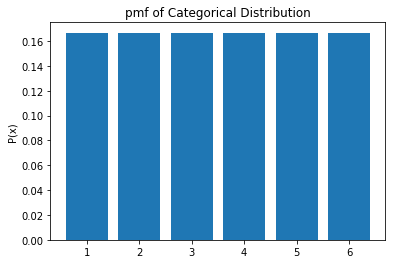

In [23]:
plt.bar(xx, rv.pmf(xx_ohe.values))
plt.ylabel("P(x)")
plt.title("pmf of Categorical Distribution")

# [분석] 이론적으로 각각 주사위 번호가 나올 확률은 동일하다

[[0 0 0 0 0 1]
 [0 0 0 0 1 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 1]
 [0 1 0 0 0 0]
 [1 0 0 0 0 0]]


Text(0.5, 1.0, 'Simulation of Categorical Distribution')

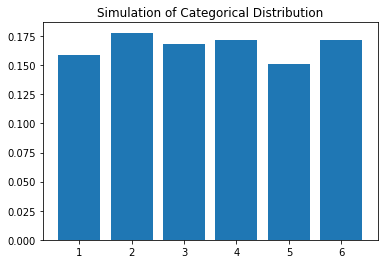

In [27]:
np.random.seed(1)
X = rv.rvs(100)
print(X[:6])  # 100개 샘플 중에서 6개의 데이타만 확인

# [하나씩 확인한다면 ]
# print(float(len(X)))
# print(X.sum())
# print(X.sum(axis=0))  # 열 단위로 합
# print(X.sum(axis=1))  # 행 단위로 합

y = X.sum(axis=0)/float(len(X))  # axis=0은 각 열단위 합 / 100 으로 나눔
plt.bar(np.arange(1,7), y)
plt.title('Simulation of Categorical Distribution')

# X = rv.rvs(1000)으로 수정해서 샘플을 1000개 하면 균등하게 나온다
# 즉 확률은 횟수가 많아질수록 균등해진다

In [28]:
# 이론과 시뮬레이션 비교 
df = pd.DataFrame({'theory': rv.pmf(xx_ohe.values), 'simulation': y },
                 index=np.arange(1,7))
df = df.stack().reset_index()
df.columns = ['sample', 'type', '%']
df.pivot('sample', 'type', '%')
df

,sample,type,%
0,1,theory,0.166667
1,1,simulation,0.159000
2,2,theory,0.166667
3,2,simulation,0.178000
4,3,theory,0.166667
5,3,simulation,0.168000
6,4,theory,0.166667
7,4,simulation,0.172000
8,5,theory,0.166667
9,5,simulation,0.151000


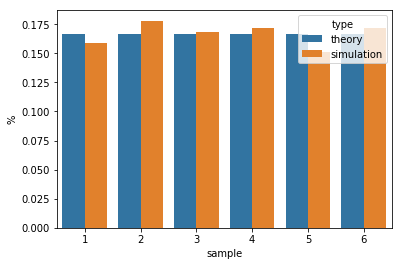

In [29]:
sns.barplot(x='sample', y='%', hue='type', data=df)

# [분석] X = rv.rvs(1000)으로 수정해서 샘플을 1000개 하면 균등하게 나온다
# 즉 확률은 횟수가 많아질수록 균등해진다

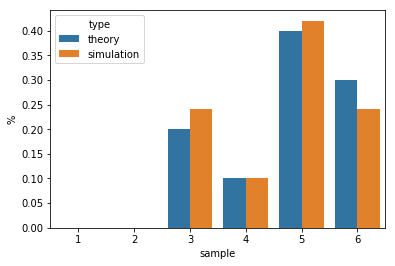

In [32]:
# 모수를 각각 지정한다면
eps = np.finfo(np.float).eps  # 부동 소숫점 중에서 가장 작은 양수의 값 : 거의 0에 가까운 정수
theta = np.array([eps, eps, 0.2, 0.1, 0.4, 0.3])
rv = sp.stats.multinomial(1, theta) # 카테고리분포는 시행횟수 n을 1로 지정

X = rv.rvs(100, random_state=1) # 램덤시드값을 1로 하여 100개 샘플 실행
y = X.sum(axis=0)/float(len(X))

df = pd.DataFrame({'theory': rv.pmf(xx_ohe.values), 'simulation': y },
                 index=np.arange(1,7))
df = df.stack().reset_index()
df.columns = ['sample', 'type', '%']
sns.barplot(x='sample', y='%', hue='type', data=df)